# 加载测试结果数据，并分类为Codec与Json数据集
```text
Codec,C03-K02,725
Json,C03-K02,2515
Codec,C16-K08,1390
Json,C16-K08,13196
Codec,C32-K16,2470
Json,C32-K16,26248
Codec,C63-K32,3063
Json,C63-K32,49477
```

In [1]:
import csv

csvFile = open("./report.out", "r")
reader = csv.reader(csvFile)

codec_list = []
json_list = []
title_list = []
for item in reader:
    if item[0] == 'Codec':
        codec_list.append(int(item[2]))
    if item[0] == 'Json':
        json_list.append(int(item[2]))
    it = item[1]
    if it not in title_list:
        title_list.append(it)
csvFile.close()

# 定义参数

In [2]:
XLABEL = "Count-Key"
YLABEL = "耗时(ns/op)"
TITLE = "Y3 vs. JSON"

# bar_ylim = 70000
# barh_xlim = 25

bar_ylim = 18000
barh_xlim = 25

from os import environ

if 'bar_ylim' in environ:
    bar_ylim = int(environ['bar_ylim'])
    
if 'barh_xlim' in environ:
    barh_xlim = int(environ['barh_xlim'])


In [3]:
# 绘制Y3与Json在不同数key数量集合中的性能差异

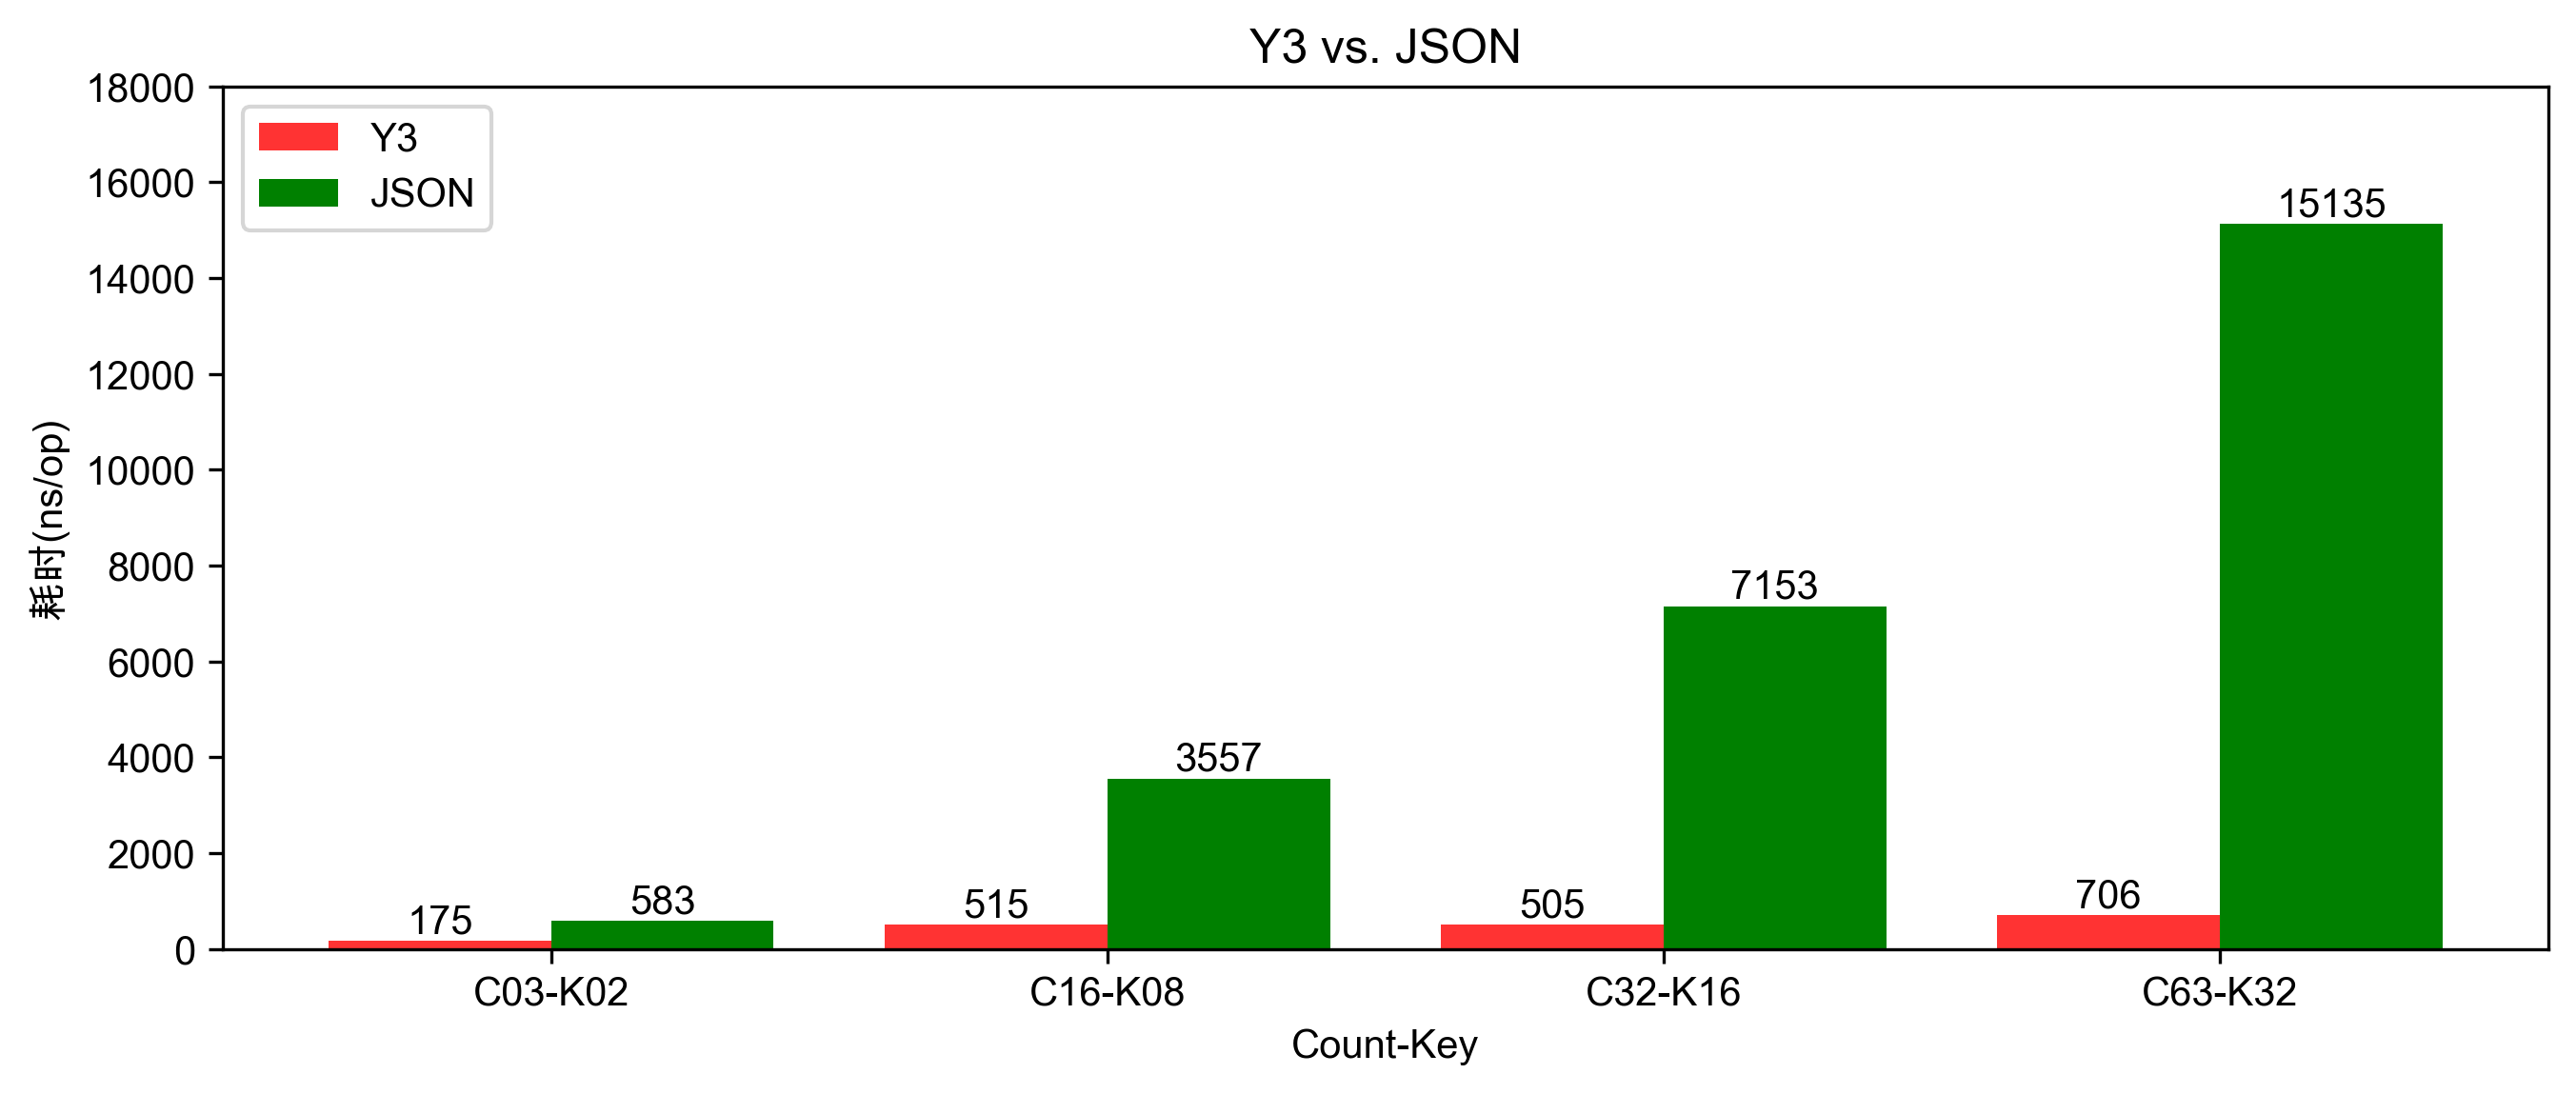

In [4]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

from IPython.core.pylabtools import figsize
figsize(10.5, 4)

plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300

label_list = title_list
num_list1 = codec_list 
num_list2 = json_list
x = range(len(num_list1))

rects1 = plt.bar(x, height=num_list1, width=0.4, alpha=0.8, color='red', label="Y3")
rects2 = plt.bar([i + 0.4 for i in x], height=num_list2, width=0.4, color='green', label="JSON")
# plt.ylim(0, 70000)
plt.ylim(0, bar_ylim)
plt.ylabel(YLABEL)

plt.xticks([index + 0.2 for index in x], label_list)
plt.xlabel(XLABEL)
plt.title(TITLE)
plt.legend()

for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
plt.savefig('./report1.jpg')
plt.show()

# 绘制Y3与Json比较结果的拆线图

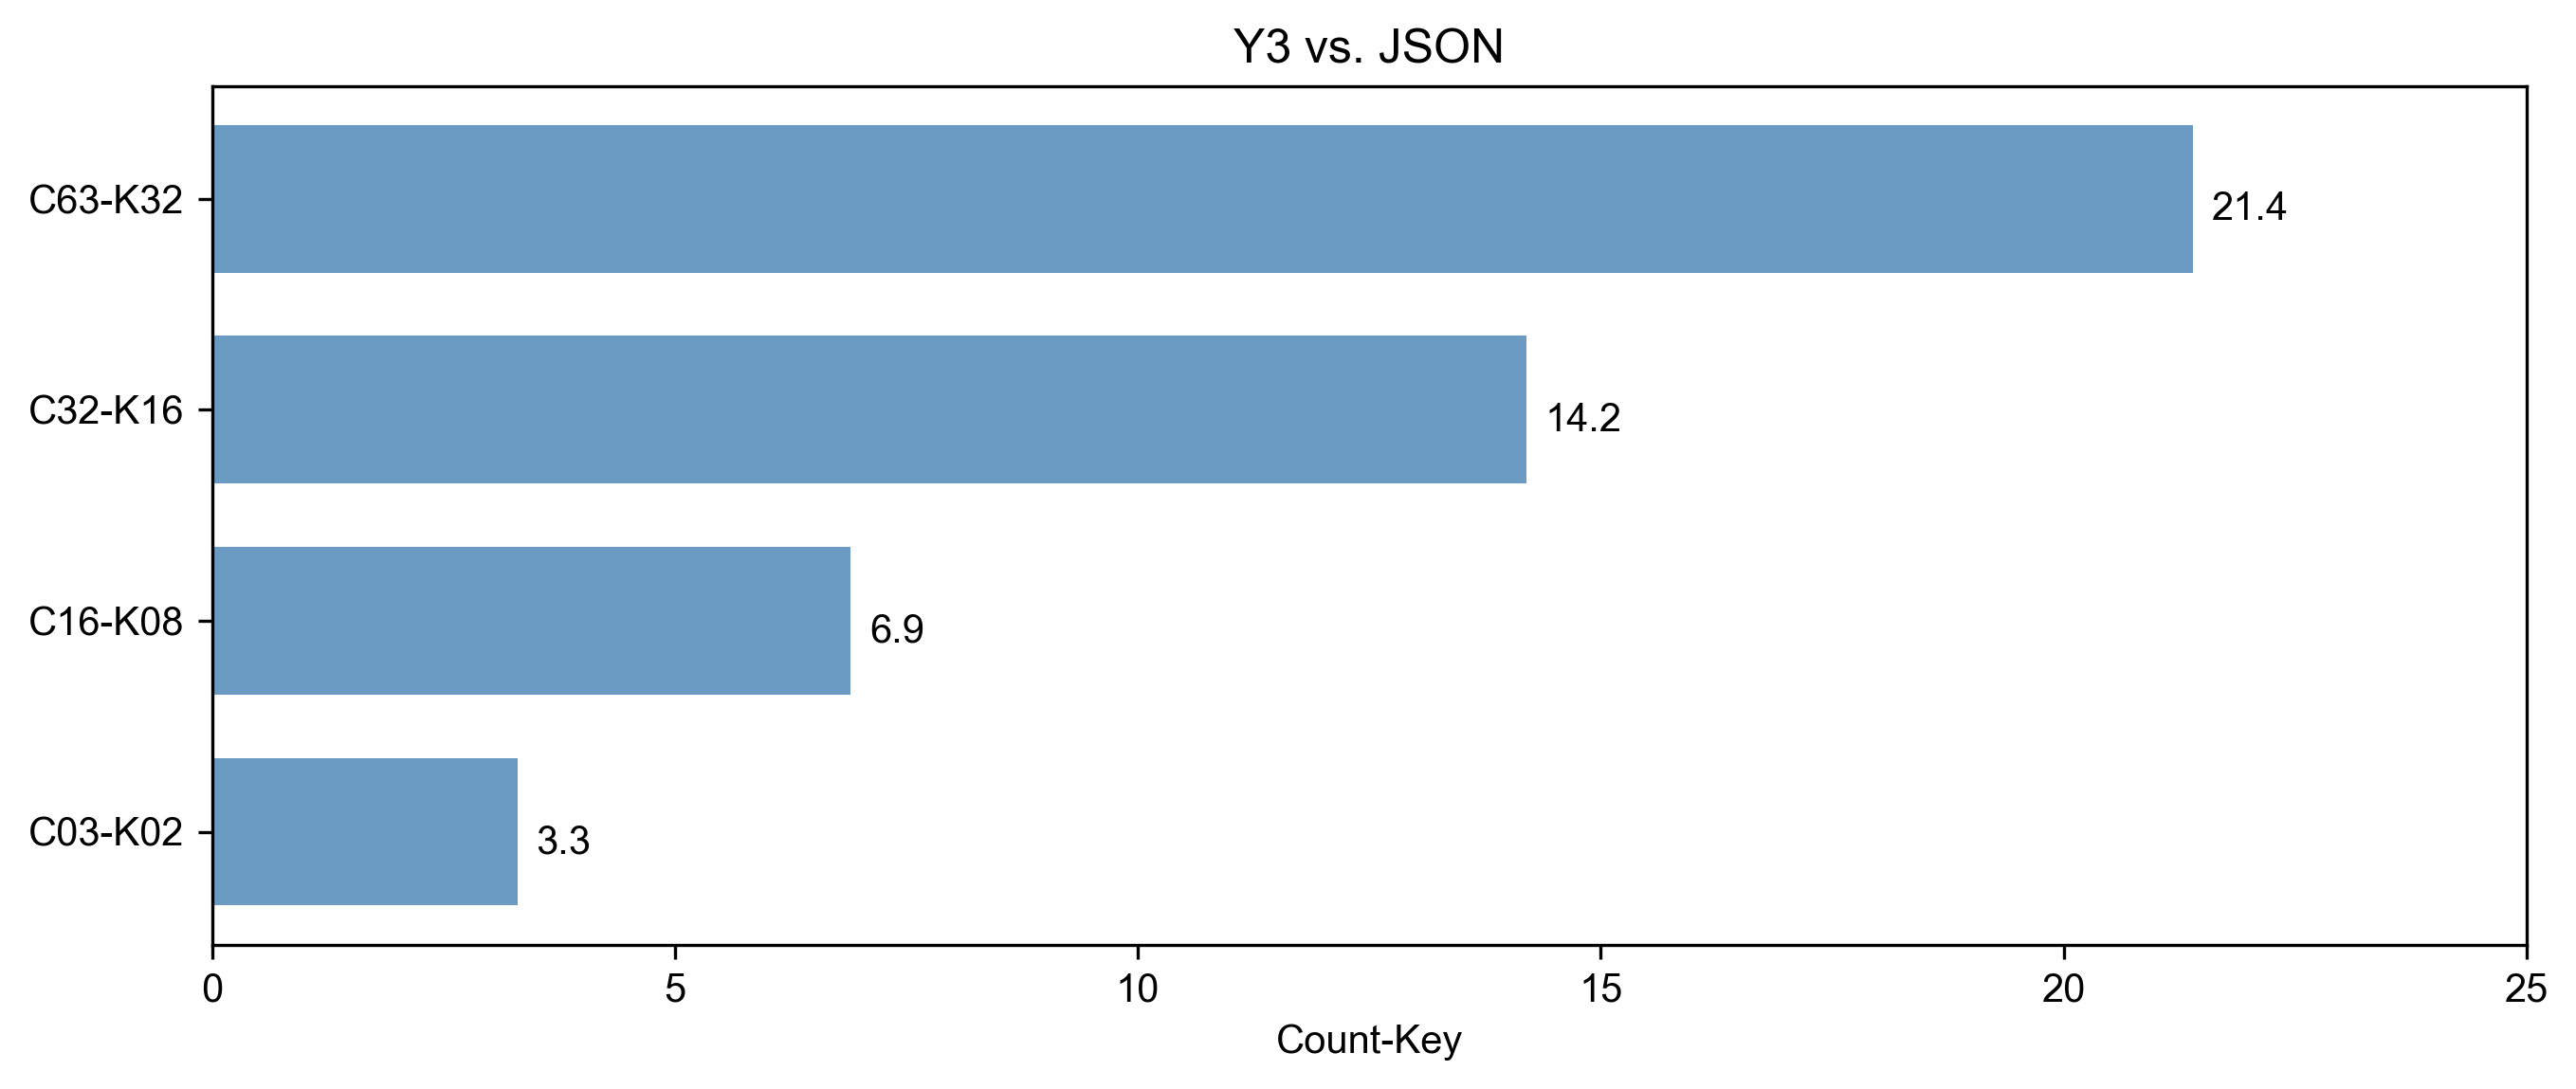

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

from IPython.core.pylabtools import figsize
figsize(10.5, 4)

multiple = np.array(json_list) / np.array(codec_list)
multiple = np.around(multiple, decimals=1)

plt.barh(range(multiple.size), multiple, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(multiple.size), title_list)
plt.xlim(0,barh_xlim)
plt.xlabel(XLABEL)
plt.title(TITLE)
for x, y in enumerate(multiple):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.savefig('./report2.jpg')
plt.show()